<a href="https://colab.research.google.com/github/harsh21CSU182/Harsh-Kaushik-RL/blob/main/RL_PRACTICAL_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***EXPLORATION***

Restaurant A:
   - Total Cumulative Reward: 4222.70
   - Average Reward: 4.51
   - Number of Selections: 937

Restaurant B:
   - Total Cumulative Reward: 61.35
   - Average Reward: 3.83
   - Number of Selections: 16

Restaurant C:
   - Total Cumulative Reward: 69.46
   - Average Reward: 4.09
   - Number of Selections: 17

Restaurant D:
   - Total Cumulative Reward: 54.28
   - Average Reward: 4.18
   - Number of Selections: 13

Restaurant E:
   - Total Cumulative Reward: 67.60
   - Average Reward: 3.98
   - Number of Selections: 17

Total Cumulative Reward Across All Restaurants: 4475.39

Final Decision:
The best restaurant to visit is Restaurant A based on average reward.


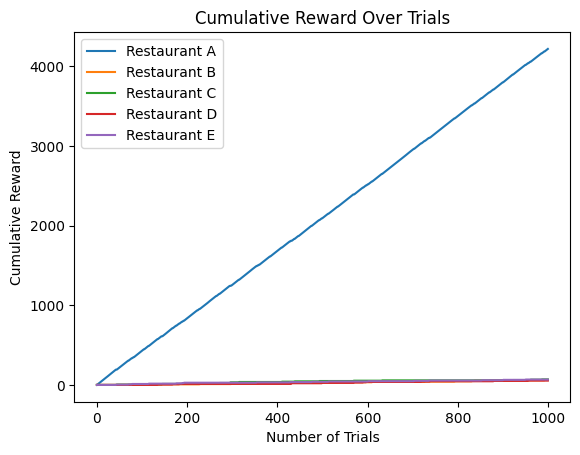

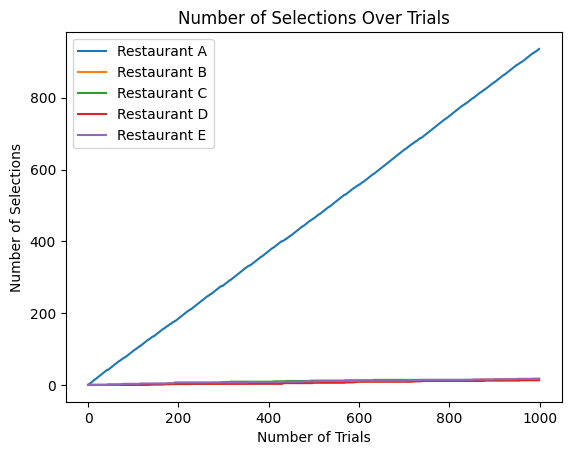

In [ ]:
import random
import matplotlib.pyplot as plt

# Define the list of restaurants with their quality (reward).
restaurants = {
    "Restaurant A": 4.5,
    "Restaurant B": 3.8,
    "Restaurant C": 4.0,
    "Restaurant D": 4.2,
    "Restaurant E": 3.9,
}

# Initialize variables for tracking rewards and restaurant selections.
total_rewards = {restaurant: 0.0 for restaurant in restaurants}
num_selections = {restaurant: 0 for restaurant in restaurants}
num_trials = 1000

# Set the epsilon parameter (controls exploration vs. exploitation).
epsilon = 0.1

# Initialize lists to store data for plotting.
cumulative_rewards_data = {restaurant: [] for restaurant in restaurants}
num_selections_data = {restaurant: [] for restaurant in restaurants}

# Initialize a variable to track the total cumulative reward across all restaurants.
total_cumulative_reward = 0.0

# Perform 1000 trials to decide which restaurant to visit.
for trial in range(num_trials):
    for restaurant in restaurants:
        cumulative_rewards_data[restaurant].append(total_rewards[restaurant])
        num_selections_data[restaurant].append(num_selections[restaurant])

    if random.random() < epsilon:
        # Exploration: Choose a random restaurant with probability epsilon.
        selected_restaurant = random.choice(list(restaurants.keys()))
    else:
        # Exploitation: Choose the restaurant with the highest estimated reward.
        selected_restaurant = max(restaurants, key=lambda r: total_rewards[r] / max(1, num_selections[r]))

    # Simulate visiting the selected restaurant and update rewards.
    reward = random.gauss(restaurants[selected_restaurant], 0.2)  # Simulated reward with some noise.
    total_rewards[selected_restaurant] += reward
    num_selections[selected_restaurant] += 1

    # Update the total cumulative reward.
    total_cumulative_reward += reward

# Calculate the average reward for each restaurant.
average_rewards = {restaurant: total_rewards[restaurant] / max(1, num_selections[restaurant]) for restaurant in restaurants}

# Print the results.
for restaurant in restaurants:
    print(f"{restaurant}:")
    print(f"   - Total Cumulative Reward: {total_rewards[restaurant]:.2f}")
    print(f"   - Average Reward: {average_rewards[restaurant]:.2f}")
    print(f"   - Number of Selections: {num_selections[restaurant]}")
    print()

# Print the total cumulative reward across all restaurants.
print(f"Total Cumulative Reward Across All Restaurants: {total_cumulative_reward:.2f}")

# Determine the final decision based on the estimated average rewards.
final_decision = max(restaurants, key=lambda r: average_rewards[r])

print("\nFinal Decision:")
print(f"The best restaurant to visit is {final_decision} based on average reward.")

# Plot the cumulative rewards for each restaurant.
for restaurant in restaurants:
    plt.plot(range(num_trials), cumulative_rewards_data[restaurant], label=restaurant)

plt.xlabel("Number of Trials")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Trials")
plt.legend()
plt.show()

# Plot the number of times each restaurant is selected.
for restaurant in restaurants:
    plt.plot(range(num_trials), num_selections_data[restaurant], label=restaurant)

plt.xlabel("Number of Trials")
plt.ylabel("Number of Selections")
plt.title("Number of Selections Over Trials")
plt.legend()
plt.show()

# ***GREEDY***

In [ ]:
import random

def greedy_approach(lamp_durations):
    best_lamp = None
    max_duration = 0

    for lamp, duration in enumerate(lamp_durations):
        if duration > max_duration:
            max_duration = duration
            best_lamp = lamp

    return best_lamp

num_lamps = 5
lamp_durations = [random.randint(1, 10) for i in range(num_lamps)]  # Generate random durations
steps = 1000

total_reward = 0
for i in range(steps):
    chosen_lamp = greedy_approach(lamp_durations)
    reward = lamp_durations[chosen_lamp]
    total_reward += reward

average_reward = total_reward / steps
print("Average reward using Greedy Approach:", average_reward)
print("Lamp chosen",chosen_lamp)

Average reward using Greedy Approach: 10.0
Lamp chosen 0


# ***UCB***

Arm 0: Estimated Mean = 0.46578151785625416
Arm 1: Estimated Mean = 0.776306442420485
Arm 2: Estimated Mean = 0.3982200071955727
Arm 3: Estimated Mean = 0.4620084925486549
Arm 4: Estimated Mean = 0.9621798572941408


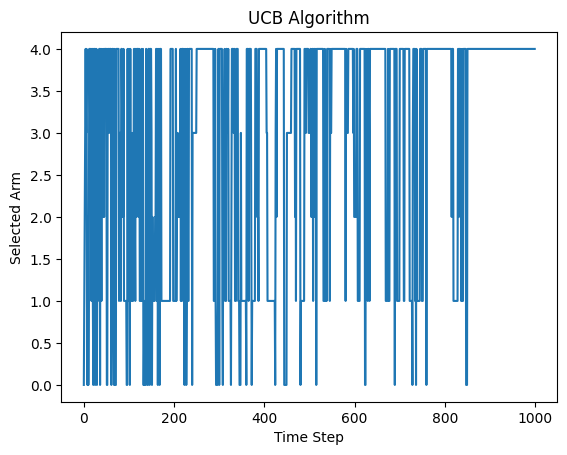

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms (bandit machines)
num_arms = 5

# True mean reward for each arm (unknown to the algorithm)
true_means = np.random.rand(num_arms)

# Number of time steps
num_steps = 1000

# Initialize variables for tracking rewards and action counts
total_rewards = np.zeros(num_arms)
action_counts = np.zeros(num_arms)

# Initialize the UCB values for each arm
ucb_values = np.zeros(num_arms)

# Initialize the list to store the history of selected arms
chosen_arms = []

# Exploration parameter (tune this value)
exploration_parameter = 2.0

# Run the UCB algorithm
for t in range(num_steps):
    # Select an arm based on UCB values
    selected_arm = np.argmax(ucb_values)

    # Simulate pulling the selected arm and observe the reward (sample from a Gaussian distribution with true mean)
    reward = np.random.normal(true_means[selected_arm], 1)

    # Update total rewards and action counts
    total_rewards[selected_arm] += reward
    action_counts[selected_arm] += 1

    # Update UCB values for all arms
    for arm in range(num_arms):
        if action_counts[arm] == 0:
            # If an arm hasn't been pulled yet, set its UCB value to a high value to encourage exploration
            ucb_values[arm] = float('inf')
        else:
            # Calculate UCB value for the arm
            mean_reward = total_rewards[arm] / action_counts[arm]
            exploration_bonus = exploration_parameter * np.sqrt(np.log(t + 1) / action_counts[arm])
            ucb_values[arm] = mean_reward + exploration_bonus

    # Record the selected arm for this time step
    chosen_arms.append(selected_arm)

# Print the estimated means for each arm
for arm in range(num_arms):
    estimated_mean = total_rewards[arm] / action_counts[arm]
    print(f"Arm {arm}: Estimated Mean = {estimated_mean}")

# Plot the results
plt.plot(chosen_arms)
plt.xlabel("Time Step")
plt.ylabel("Selected Arm")
plt.title("UCB Algorithm")
plt.show()

# ***OPTIMISTIC GREEDY***

In [ ]:
import random

def optimistic_approach(lamp_durations):
    num_lamps = len(lamp_durations)
    estimated_durations = [10] * num_lamps  # Initialize with optimistic estimates
    chosen_lamp = None

    for lamp, _ in enumerate(lamp_durations):
        observed_duration = random.randint(1, 10)  # Generate random observed duration
        estimated_durations[lamp] = observed_duration

    for _ in range(steps):
        chosen_lamp = estimated_durations.index(max(estimated_durations))
        reward = lamp_durations[chosen_lamp]
        observed_duration = random.randint(1, 10)  # Generate random observed duration
        estimated_durations[chosen_lamp] = (estimated_durations[chosen_lamp] + observed_duration) / 2

    return chosen_lamp

num_lamps = 5
lamp_durations = [random.randint(1, 10) for _ in range(num_lamps)]  # Generate random durations
steps = 1000

total_reward = 0
for _ in range(steps):
    chosen_lamp = optimistic_approach(lamp_durations)
    reward = lamp_durations[chosen_lamp]
    total_reward += reward

average_reward = total_reward / steps
print("Average reward using Optimistic Approach:", average_reward)

Average reward using Optimistic Approach: 5.483


# ***EPSILON***

In [ ]:
import random

def epsilon_greedy_approach(lamp_durations, epsilon):
    num_lamps = len(lamp_durations)
    chosen_lamp = None

    for _ in range(steps):
        if random.random() < epsilon:
            chosen_lamp = random.randint(0, num_lamps - 1)
        else:
            chosen_lamp = lamp_durations.index(max(lamp_durations))
        reward = lamp_durations[chosen_lamp]
        observed_duration = random.randint(1, 10)  # Generate random observed duration
        lamp_durations[chosen_lamp] = (lamp_durations[chosen_lamp] + observed_duration) / 2

    return chosen_lamp

num_lamps = 5
lamp_durations = [random.randint(1, 10) for _ in range(num_lamps)]  # Generate random durations
steps = 1000
exploration_probability = 0.1  # Set epsilon value

total_reward = 0
for _ in range(steps):
    chosen_lamp = epsilon_greedy_approach(lamp_durations, exploration_probability)
    reward = lamp_durations[chosen_lamp]
    total_reward += reward

average_reward = total_reward / steps
print("Average reward using Epsilon-Greedy Approach:", average_reward)

Average reward using Epsilon-Greedy Approach: 5.4647166189913925
